In [2]:
# Se importa la libreria csv
import csv

# Se abre el archivo de texto, datos_generales.txt y se lee con el delimitador | 
with open('datos_generales.txt', 'r') as txtfile:
    txtreader = csv.reader(txtfile, delimiter='|')

    with open('datos_ofuscados.csv', 'w', newline='') as csvfile:
        csvwriter = csv.writer(csvfile)

        for row in txtreader:
            csvwriter.writerow(row)

In [3]:
# Se importa la libreria pandas
import pandas as pd

# Se lee el archivo de texto, datos_ofuscados.csv y se almacena en un dataframe de pandas
file_path = 'datos_ofuscados.csv'
df = pd.read_csv(file_path)

# Se imprime el dataframe de pandas
df.head()


,FEC_CONS,FEC_PROC,TIP_TRAN,IMP_ORI_TOT,MON_IMP,IMP_DES,PAR_DES,CVE_COM,MCC,NOM_COM,plasticoF,ClienteF,tipo
0,28FEB2021:00:00:00.000000,01MAR2021,1,409.57,484,409.57,0.0000,1008440,5411,SORIANA343 GARZA SADA,F9B9D796848AF6B19CE60682F5632F0CF500CADF7190B6...,0007ADBB921C28F452E4A6AC20C1B42A0FC94613163048...,TDD
1,01MAR2021:00:00:00.000000,02MAR2021,1,17.00,484,17.00,20.6123,10025426,5815,APPLE.COM/BILL,F9B9D796848AF6B19CE60682F5632F0CF500CADF7190B6...,0007ADBB921C28F452E4A6AC20C1B42A0FC94613163048...,TDD
2,02MAR2021:00:00:00.000000,04MAR2021,1,69.00,484,69.00,0.0000,6041503,5499,7 ELEVEN HILARIO MTZ,F9B9D796848AF6B19CE60682F5632F0CF500CADF7190B6...,0007ADBB921C28F452E4A6AC20C1B42A0FC94613163048...,TDD
3,02MAR2021:20:15:02.000000,02MAR2021,1,998.37,484,998.37,0.0000,7895432,5411,MERCO NUEVO REPUBLO,F9B9D796848AF6B19CE60682F5632F0CF500CADF7190B6...,0007ADBB921C28F452E4A6AC20C1B42A0FC94613163048...,TDD
4,03MAR2021:00:00:00.000000,04MAR2021,1,259.00,484,259.00,0.0000,7948490,5499,7 ELEVEN PALESTINA,F9B9D796848AF6B19CE60682F5632F0CF500CADF7190B6...,0007ADBB921C28F452E4A6AC20C1B42A0FC94613163048...,TDD


In [4]:
# Se importa la libreria string y re
import string
import re

# Se define la funcion preprocess_text que recibe un texto y lo convierte a minusculas, elimina los numeros, 
# elimina los signos de puntuacion y elimina los espacios en blanco al inicio y al final del texto 
def preprocess_text_advanced(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    return text

# Se aplica la funcion preprocess_text al dataframe de pandas y se almacena en una nueva columna llamada NOM_COM_clean_advanced
df.to_csv('datos_ofuscados_preprocessed.csv', index=False)
df['NOM_COM_clean_advanced'] = df['NOM_COM'].apply(preprocess_text_advanced)


In [5]:
# Se crea el diccionario keywords_dict que contiene las categorias y las palabras clave que se usaran para clasificar los nombres de los comercios
keywords_dict = {
    'Comida': ['restaurant', 'fprohibido', 'tio poncho', 's s', 'th', 'meat', 'mochis', 'baguet', 'maria bonita', 'italia', 'nipon', 'fries', 'dazs', 'asturi', 'ramos', 'timon', 'fish', 'applebees', 'yog', 'pizz', 'vino', 'bowl', 'lobster', 'pozole', 'bake', 'pay', 'modelor', 'mirai', 'maris', 'palmit', 'siber', 'rocket', 'bbq', 'hooter', 'cow', 'gourmet', 'elote', 'salad', 'pesca', 'cof', 'dq', 'camaron', 'denny', 'beer', 'tabern', 'vegan', 'veget', 'grill', 'lunch', 'brunch', 'maiz', 'nestle', 'la mexicana', 'granos', 'froyo', 'churr', 'cinnab', 'cerve', 'chicken', 'chocola', 'almuerzo', 'cantina', 'bimbo', 'birri', 'bar', 'tak', 'aliment', 'gelato', 'cocina', 'food', 'nutrisa', 'sushi', 'maison', 'pf', 'parril', 'chil', 'botan', 'starbuck', 'sanborn', 'pan', 'bis', 'toks', 'crep', 'asad', 'cremer', 'tostada', 'comi', 'buffet', 'cabrito', 'lacteo', 'cafe', 'pastor', 'pizza',  'mcdonalds', 'buffalo',  '7 eleven',  '7eleven','busha', 'bucha', 'monch', 'pollo', 'sayu', 'muncher', 'oxxo', 'rappi', 'rest',  'carls', 'little', 'subway', 'kfc', 'coffee', 'tortas', 'church', 'dominos', 'sazon', 'sirloin', 'josephinos', 'pastel', 'mc', 'taco', 'dairy', 'taque', 'jac', 'patsel', 'bur',  'wing', 'alita', 'antoj', 'vips', 'spikes', 'dona', 'repost', 'helado', 'el chino', 'sirlon', 'frut', 'bueneros', 'dulce', 'nacho', 'cafe', 'caffe'],
    'Transporte': ['uber', 'senda', 'transp', 'est', 'mobility', 'ado', 'taxi', 'bus', 'metro', 'didi rides', 'cabify', 'lyft', 'taxify', 'didimx'],
    'Ropa': ['ropa', 'converse', 'fan town', 'impuls', 'shoe', 'flexi', 'secret', 'vertiche', 'puma', 'taf', 'tj', 'moda', 'ross', 'fashion', 'old navy', 'marshall', 'vuitton', 'jcpen', 'jean', 'hugo boss', 'gucci', 'gaynor', 'outlet', 'closet', 'c a', 'bols', 'plat', 'aldo conti', 'h&m', 'h & m', 'zara', 'p&b', 'bsk',  'shein', 'joy', 'swatch', 'textil', 'soho', 'lefties', 'zap', 'adidas', 'suburbia', 'nike', 'tienda', 'mall', 'pull', 'shasa', 'telas', 'bersh', 'american eagle'],
    'Salud': ['far', 'mvision', 'arceo', 'med', 'lux', 'hos', 'fam', 'dent', 'podol', 'doct', 'dr', 'consult',  'salud', 'odont', 'quiro', 'chopo',  'gnc', 'drog', 'opti', 'hospital', 'clinica', 'benavi', 'ahorro', 'lab', 'derma'],
    'Entretenimiento': ['cine', 'foto', 'mubi', 'xbox', 'paramount', 'nintend', 'tinder', 'activision', 'youtube', 'roblox', 'game', 'gandhi', 'unicornio', 'ticket', 'riot', 'cultura', 'hbo', 'sorteo', 'crunchyroll', 'vix', 'noctur', 'dragon', 'boler', 'bolet', 'arena', 'auditorio', 'juguet', 'porrua', 'book', 'teatro', 'arte', 'vide', 'play', 'garena', 'musica', 'mixup', 'juegos', 'spotify', 'prime', 'netflix', 'disney', 'izzi', 'totalplay',  'megacable', 'cel'],
    'Tecnologia': ['apple', 'cva', 'steren', 'mac',  'iphone', 'computadora', 'software', 'hardware', 'dell', 'samsung', 'microsoft', 'electronics', 'tvc', 'pc', ],
    'Servicios': ['cfe', 'blim', 'cbp',  'deez', 'times', 'godadd', 'ser', 'movist', 'inversio', 'gayosso', 'estafeta', 'envia', 'dhl', 'go dadd', 'canva', 'cable', 'at&t',  'att','seguro', 'univers', 'midjourney', 'adobe', 'tintor', 'zoom', 'storage', 'ayunt', 'agua', 'tel', 'petro', 'gas', 'finanz', 'naturgy', 'gob', 'munici'],
    'Viajes': ['airbnb', 'flecha amarilla', 'aero mag', 'magni', 'gran plaza', 'turis', 'inn', 'teso', 'expedia', 'hotel', 'aerom', 'aeropuer', 'premier'],
    'Casa': ['home', 'plofer', 'dico', 'imper', 'invern', 'cmx', 'comex', 'plom', 'casa', 'clima', 'ferr', 'refri', 'elect', 'tornill', 'infonavit'],
    'Vehiculo': ['auto', 'shell', 'good year', 'gulf', 'icv', 'refac', 'toyota', 'nissan', 'hyund', 'vehi', 'conces', 'wash', 'car', 'moto', 'llant', 'ford', 'audi', ],
    'Departamental': ['ekt', 'sol', 'coppel', 'boutique', 'body', 'liver', 'palacio', 'sears', 'bazar'],
    'Super': ['cost', 'bae', 'mark', 'circle k', 'mart', 'cityclub', 'retail', 'ctral', 'central', 'abast', 'abrr', 'abts', 'comer', 'merca', 'sam', 'almacen', 'mayore', 'chedra', 'city', 'aur', 'sup', 'jokr', 'city club', 'soriana', 'merco', 'grocery', 'abar', 'wal', 'heb', 'bodeg', 'h-e', 'target'],
    'Mascotas': ['vet', 'pet', 'acua', 'animal'],
    'Deportes': ['padel', 'dep', 'fitness', 'chivas', 'sultanes', 'deca', 'gym', 'mlb'],
    'Educacion': ['uni', 'uvm', 'ccu'],
    'Belleza': ['nail', 'beaty', 'perf', 'salon', 'pelu', 'barb', 'beauty', 'makeup', 'make up', 'maquill', 'estetica', 'estética', 'esth',],
    'Compras en Linea': ['amazon', 'google', 'shopee', 'shoppe', 'ebay', 'paypal, aliex', 'wish', 'shopify', 'aliexpress'],
    'Otros':['facebk', 'fant', 'cash', "plastic", 'mateco', 'miniso', 'office', 'tela', 'clip', 'manualidades', 'papel', 'cuero', 'paris', 'nuevo mund', 'regal', 'fantas'],
    
    # Agregar en Otros Plasticos y Telas y Nombre 
    # Amazon y Shopee entrar en Compras en Linea
    # Modelos Watson x Categorizarloszz
}

# Se define la funcion label_category que recibe un nombre y lo clasifica en una categoria
def label_category(name):
    name_lower = name.lower()
    for category, keywords in keywords_dict.items():
        if any(keyword in name_lower for keyword in keywords):
            return category
    return 'Miscellaneous'

# Se aplica la funcion label_category al dataframe de pandas y se almacena en una nueva columna llamada Category
df['Category'] = df['NOM_COM'].apply(label_category)

# Se imprime el dataframe de pandas con las nuevas columnas
df.to_csv('datos_ofuscados_reprocessed.csv', index=False)

# Se imprime el dataframe de pandas con las nuevas columnas y se filtra por las columnas NOM_COM y Category
df[['NOM_COM', 'Category']].head()
misc_df = df[df['Category'] == 'Miscellaneous'][['NOM_COM', 'Category']]
print(misc_df)


                         NOM_COM       Category
135               IZ  COMPRABIEN  Miscellaneous
172            IZ  TECKEL MEXICO  Miscellaneous
497                       SYSCOM  Miscellaneous
600    2CO.COM*MOVAVI.COM 163815  Miscellaneous
648            POINTMP*MESASLETY  Miscellaneous
...                          ...            ...
26166        LIB GONVILL GRA PZA  Miscellaneous
26169     ZTL*DISTRIBUIDORAARCAC  Miscellaneous
26190          UXIXC GUADALAJARA  Miscellaneous
26200               QIN GALERIAS  Miscellaneous
26201               QIN GALERIAS  Miscellaneous

[2318 rows x 2 columns]


In [6]:
# Se importa la libreria sklearn, TruncatedSVD y TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

# Se crea el vectorizer 
vectorizer = TfidfVectorizer()

# Se aplica el vectorizer al dataframe de pandas y se almacena en una nueva columna llamada NOM_COM_clean_advanced
X_tfidf = vectorizer.fit_transform(df['NOM_COM_clean_advanced'])
svd = TruncatedSVD(n_components=100)
X_reduced = svd.fit_transform(X_tfidf)

# Se imprime el dataframe de pandas con las nuevas columnas
reduced_df = pd.DataFrame(X_reduced)
reduced_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,4.757585e-08,2.842201e-06,1.388061e-06,2.914254e-05,3.289192e-05,1.441785e-04,2.693617e-08,1.853400e-07,3.019990e-04,1.399094e-03,...,-4.739600e-03,-4.169905e-02,7.399392e-02,-6.663287e-02,-7.107752e-02,6.753468e-02,-5.568868e-02,-1.241593e-01,5.054401e-02,-5.854644e-02
1,-9.894960e-15,1.965175e-12,1.604455e-12,1.505891e-11,-1.714591e-11,1.140197e-09,1.000000e+00,-7.817386e-11,6.300608e-12,-7.997267e-11,...,-2.677744e-09,1.531114e-08,-1.351526e-09,-2.134065e-08,1.110721e-08,-3.569408e-09,-4.651826e-09,3.341274e-08,-8.683645e-09,2.323511e-08
2,6.453799e-09,4.783459e-06,3.500764e-07,1.492852e-04,3.086330e-04,6.568670e-01,-1.310599e-08,-1.328133e-06,-4.297617e-04,-3.035684e-04,...,-1.130107e-02,1.013016e-02,-5.936239e-03,2.725989e-03,-1.489133e-03,3.825172e-03,-5.428423e-05,1.746752e-03,4.873551e-03,-3.763031e-03
3,4.457297e-10,1.027369e-07,1.458984e-08,3.462696e-06,2.291229e-05,3.638431e-05,-4.071871e-08,-6.374429e-08,1.371450e-04,4.872932e-05,...,2.618011e-02,7.126420e-02,-2.446634e-02,2.057027e-02,1.583287e-02,9.762145e-02,-3.046301e-02,-2.965402e-02,-2.346550e-02,2.094245e-03
4,1.600702e-08,4.811077e-06,5.623634e-07,1.125104e-04,2.518241e-04,4.901116e-01,-3.115683e-09,-9.429269e-07,-3.558911e-04,9.052033e-05,...,2.073094e-02,-1.855069e-02,8.101936e-03,-3.929044e-03,2.079973e-03,-1.894688e-03,1.236175e-05,1.027019e-03,5.437843e-03,5.881896e-03


In [7]:
# Se importa la libreria sklearn, MinMaxScaler y train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Se crea el scaler
scaler = MinMaxScaler()

# Se escala el dataframe de pandas
X_scaled = scaler.fit_transform(X_reduced)

# Se imprime el dataframe de pandas con las nuevas columnas
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)




In [11]:
# Se importa la libreria sklearn, RandomForestClassifier, accuracy_score, f1_score, precision_score y recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Se crea el clasificador RandomForestClassifier y se entrena con los datos de entrenamiento
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Se predicen los datos de prueba
rf_y_pred = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred, average='weighted')
rf_precision = precision_score(y_test, rf_y_pred, average='weighted')
rf_recall = recall_score(y_test, rf_y_pred, average='weighted')


rf_accuracy, rf_f1, rf_precision, rf_recall


(0.9409298780487805,
 0.9416209763138333,
 0.9444625421249909,
 0.9409298780487805)

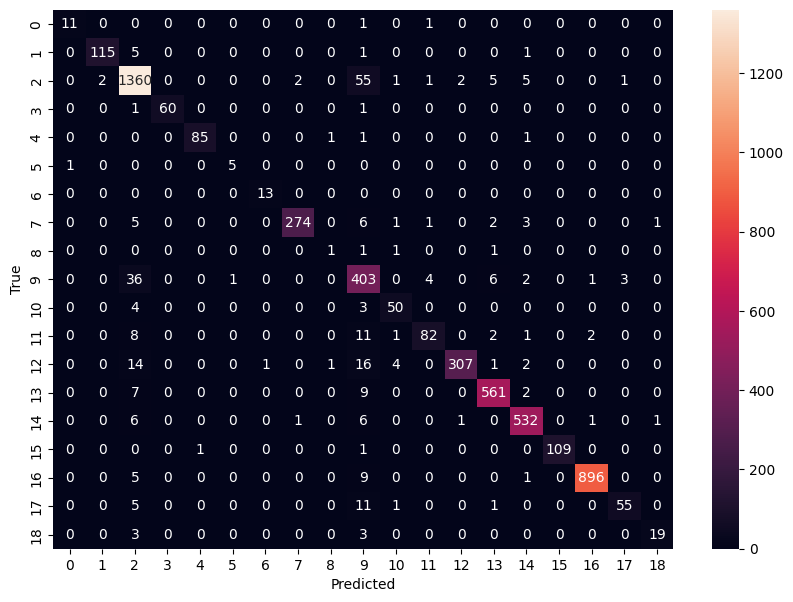

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test are your true labels and rf_y_pred are your predictions
conf_matrix = confusion_matrix(y_test, rf_y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [9]:
# Se importan los datos de prueba
test_df = pd.read_csv("datos_test.csv")

# Se aplica la funcion preprocess_text al dataframe de pandas y se almacena en una nueva columna llamada NOM_COM_clean_advanced
test_df['NOM_COM_clean_advanced'] = test_df['NOM_COM'].apply(preprocess_text_advanced)
X_test_tfidf = vectorizer.transform(test_df['NOM_COM_clean_advanced'])
X_test_reduced = svd.transform(X_test_tfidf)
X_test_scaled = scaler.transform(X_test_reduced)

# Se predicen los datos de prueba
test_df['Predicted_Category'] = rf_clf.predict(X_test_scaled)

# Se imprime el dataframe de pandas con las nuevas columnas
test_dataset_with_predictions_path = 'test_dataset_with_predictions.csv'
test_df.to_csv(test_dataset_with_predictions_path, index=False)
test_dataset_with_predictions_path



'test_dataset_with_predictions.csv'